In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

C:\Users\Jahanvi B Dinesh\AppData\Local\Temp\ipykernel_17264\1762469038.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
# Load and preprocess data
def Normalize(X):
    mean = np.mean(X, axis=0)  # Mean for each feature
    std = np.std(X, axis=0)    # Standard deviation for each feature
    return (X - mean) / std                      # TODO: Implement the normalization function


def load_data():
    # url_hospital = "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
    data = pd.read_csv(
        "haberman.csv",
        header=None,
        names=["age", "year", "nodes_detected", "survival_status"],
    )
    X = data.iloc[:, :3].to_numpy()
    y = (data.iloc[:, 3] == 1).astype(int)  # Convert survival status to binary
    X = Normalize(X)

    return X, y

In [ ]:
# Logistic function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))                        # TODO: Implement the sigmoid function


# Negative Log-Likelihood
def nll(beta, X, y):
    probabilities = sigmoid(X @ beta)
    nll = -np.sum(y * np.log(probabilities) + (1 - y) * np.log(1 - probabilities))
    return nll                                          # TODO: Implement NLL function


# Gradient of NLL
def gradientf(beta, X, y):
    probabilities = sigmoid(X @ beta)
    return X.T @ (probabilities - y)     # TODO: Implement the gradient of NLL


# Hessian of NLL
def hessianf(beta, X):
    probabilities = sigmoid(X @ beta)
    W = np.diag(probabilities * (1 - probabilities))
    return X.T @ W @ X       # TODO: Implement the hessian of NLL

In [ ]:
# Newton-Raphson optimization
def newton_raphson(X, y, tol=1e-6, max_iter=100):
    beta = np.zeros(X.shape[1])  # Initialize beta
    for _ in range(max_iter):
        gradient = gradientf(beta, X, y)
        hessian = hessianf(beta, X)
        beta_new = beta - np.linalg.inv(hessian) @ gradient
        if np.linalg.norm(beta_new - beta, ord=2) < tol:
            break
        beta = beta_new
    return beta    # TODO: Implement the Newton-Raphson optimization


In [ ]:
def predict(X, beta):
    threshold = 0.5
    probabilities = sigmoid(X @ beta)  # Compute probabilities using logistic function
    return (probabilities >= threshold).astype(int)    # TODO: Implement the prediction function

In [ ]:
# Main workflow

# Load and preprocess data
X, y = load_data()

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train logistic regression model
beta = newton_raphson(X_train, y_train)

# Predictions and evaluation metrics for Newton Raphson
NP_preds = predict(X_test, beta)
NP_accuracy = accuracy_score(y_test, NP_preds)
NP_precision = precision_score(y_test, NP_preds)
NP_recall = recall_score(y_test, NP_preds)
NP_f1 = f1_score(y_test, NP_preds)

# Print metrics
print(f"Newton Raphson Accuracy: {NP_accuracy:.2f}")
print(f"Newton Raphson Precision: {NP_precision:.2f}")
print(f"Newton Raphson Recall: {NP_recall:.2f}")
print(f"Newton Raphson F1 Score: {NP_f1:.2f}")



Newton Raphson Accuracy: 0.66
Newton Raphson Precision: 0.76
Newton Raphson Recall: 0.77
Newton Raphson F1 Score: 0.76


In [ ]:
# Train logistic regression model using sklearn
logreg = LogisticRegression(fit_intercept=True, solver="lbfgs")
logreg.fit(X_train, y_train)

# Predictions and evaluation metrics for Scikit Learn
SC_preds = logreg.predict(X_test)
SC_accuracy = accuracy_score(y_test, SC_preds)
SC_precision = precision_score(y_test, SC_preds)
SC_recall = recall_score(y_test, SC_preds)
SC_f1 = f1_score(y_test, SC_preds)
# Print metrics
print(f"Scikit Learn Accuracy: {SC_accuracy:.2f}")
print(f"Scikit Learn Precision: {SC_precision:.2f}")
print(f"Scikit Learn Recall: {SC_recall:.2f}")
print(f"Scikit Learn F1 Score: {SC_f1:.2f}")

Scikit Learn Accuracy: 0.69
Scikit Learn Precision: 0.73
Scikit Learn Recall: 0.91
Scikit Learn F1 Score: 0.81


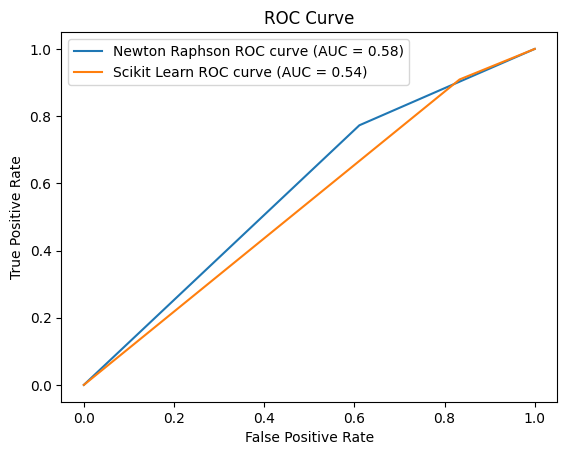

In [ ]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, NP_preds)
fpr2, tpr2, _ = roc_curve(y_test, SC_preds)
roc_auc = auc(fpr, tpr)
roc_auc2 = auc(fpr2, tpr2)
plt.plot(fpr, tpr, label=f"Newton Raphson ROC curve (AUC = {roc_auc:.2f})")
plt.plot(fpr2, tpr2, label=f"Scikit Learn ROC curve (AUC = {roc_auc2:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
# Gradient of the negative log-posterior
def grad_neg_log_posterior(beta, X, y):
    grad = gradientf(beta, X, y) + beta  # Add prior gradient
    return grad     #TODO: Implement the gradient of Negative log-posterior


# Hessian of the negative log-posterior
def hessian_neg_log_posterior(beta, X):
    hessian = hessianf(beta, X) + np.eye(X.shape[1])  # Add prior Hessian
    return hessian       # TODO: Implement the hessian of Negative log-posterior

In [ ]:
hessian = hessian_neg_log_posterior
gradient = grad_neg_log_posterior

# Train logistic regression model for Laplace approximation
LA_beta = newton_raphson(X_train, y_train)

# Predictions and evaluation metrics for Newton Raphson
LA_preds = predict(X_test, LA_beta)
LA_accuracy = accuracy_score(y_test, LA_preds)
LA_precision = precision_score(y_test, LA_preds)
LA_recall = recall_score(y_test, LA_preds)
LA_f1 = f1_score(y_test, LA_preds)

# Print metrics
print(f"Laplace approximation Accuracy: {LA_accuracy:.2f}")
print(f"Laplace approximation Precision: {LA_precision:.2f}")
print(f"Laplace approximation Recall: {LA_recall:.2f}")
print(f"Laplace approximation F1 Score: {LA_f1:.2f}")

Laplace approximation Accuracy: 0.66
Laplace approximation Precision: 0.76
Laplace approximation Recall: 0.77
Laplace approximation F1 Score: 0.76
